<a href="https://colab.research.google.com/github/germfsip/2231Procesamiento-digital-de-imagenes/blob/main/PDI_Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento digital de imagenes 
#Laboratorio 4 Segmentación
##Dr. Gerardo Mtz

Bibliotecas

In [18]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

Abrir la imagen

In [ ]:
img= cv2.imread("cafe.jpg")
cv2_imshow(img)

Características de la imagen

In [20]:
def medidas(imagen):
  print('Tamaño = ',imagen.shape)
  print('Alto = ',imagen.shape [0])
  print('Ancho = ',imagen.shape [1])
  print('Valor max  = ',np.max(imagen))
  print('Valor min  = ',np.min(imagen))

medidas(img)

Tamaño =  (900, 600, 3)
Alto =  900
Ancho =  600
Valor max  =  255
Valor min  =  0


Abrir imagen en un solo color Rojo

In [ ]:
img_R = img[:,:,2]
medidas(img_R)
cv2_imshow(img_R)

Abrir imagen en un solo color Verde

In [ ]:
img_V = img[:,:,1]
medidas(img_V)
cv2_imshow(img_V)

Abrir imagen en un solo color Azul

In [ ]:
img_A = img[:,:,0]
medidas(img_A)
cv2_imshow(img_A)

Recortar una imagen

Tamaño =  (400, 300, 3)
Alto =  400
Ancho =  300
Valor max  =  255
Valor min  =  0


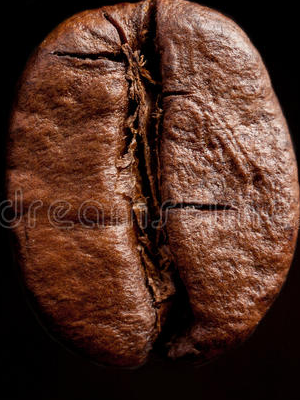

In [108]:
imagen_recortada = img[250:650, 150:450]
medidas(imagen_recortada)
cv2_imshow(imagen_recortada)


Generar una imagen en tonos de grises

In [ ]:
#Por biblioteca
img_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
medidas(img_grises)
cv2_imshow(img_grises)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


Tamaño =  (900, 600, 3)
Alto =  900
Ancho =  600
Valor max  =  85
Valor min  =  0


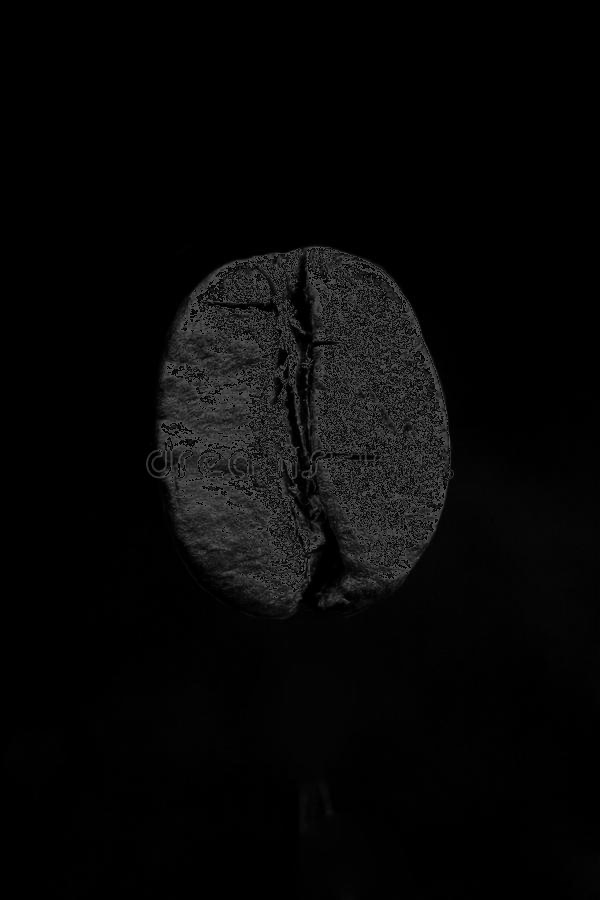

In [83]:
#Por promedio
img_grises2 = np.zeros(img.shape,np.uint8)

for i in range(img.shape[0]): #recorrer filar
  for j in range(img.shape[1]): #recorrer columnas
    img_grises2[i,j] = (img[i,j,0]+img[i,j,1]+img[i,j,2])/3
medidas(img_grises2)
cv2_imshow(img_grises2)

In [ ]:
#Por YIQ
img_grises3 = np.zeros(img.shape,np.uint8)
for i in range(img.shape[0]): #recorrer filar
  for j in range(img.shape[1]): #recorrer columnas
    img_grises3[i,j] = (img[i,j,0]*0.299 +img[i,j,1] * 0.587 + img[i,j,2]*0.114)
medidas(img_grises3)
cv2_imshow(img_grises3)

#Funcion segmentación por Umbral

In [90]:
def segmentar(img, umbral):
  sal = np.zeros(img.shape, np.uint8)
  area = 0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      aux=(img[i,j,0]+img[i,j,1]+img[i,j,2])/3
      if aux > 70:
              
        sal[i,j] = 255
        area = area + 1
  print('area = ',area)
  return sal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


area =  10023
Tamaño =  (900, 600, 3)
Alto =  900
Ancho =  600
Valor max  =  255
Valor min  =  0


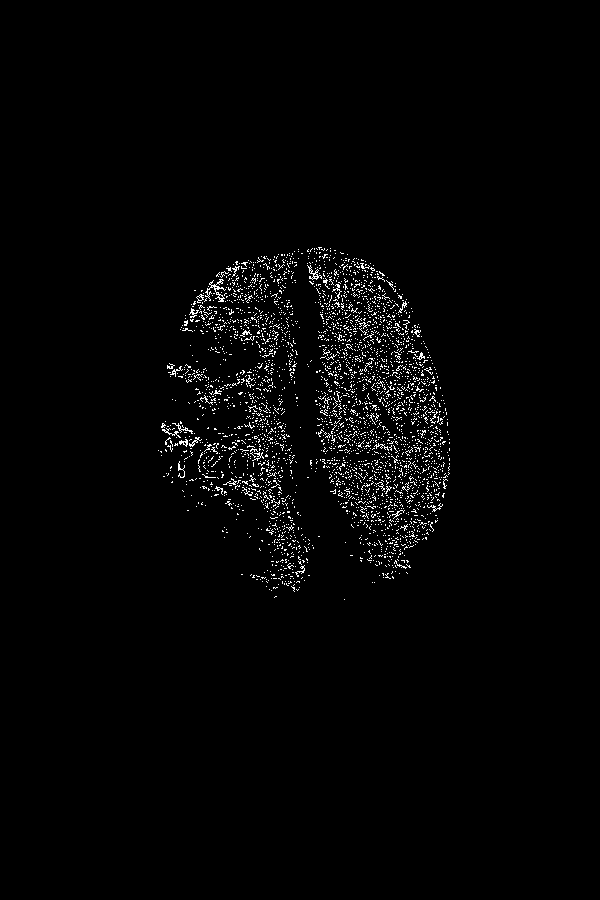

In [94]:
segmentado = segmentar(img_grises3, 170)
medidas(segmentado)
cv2_imshow(segmentado)

#Un ejemplo con más variables

Tamaño =  (980, 1556, 3)
Alto =  980
Ancho =  1556
Valor max  =  249
Valor min  =  0


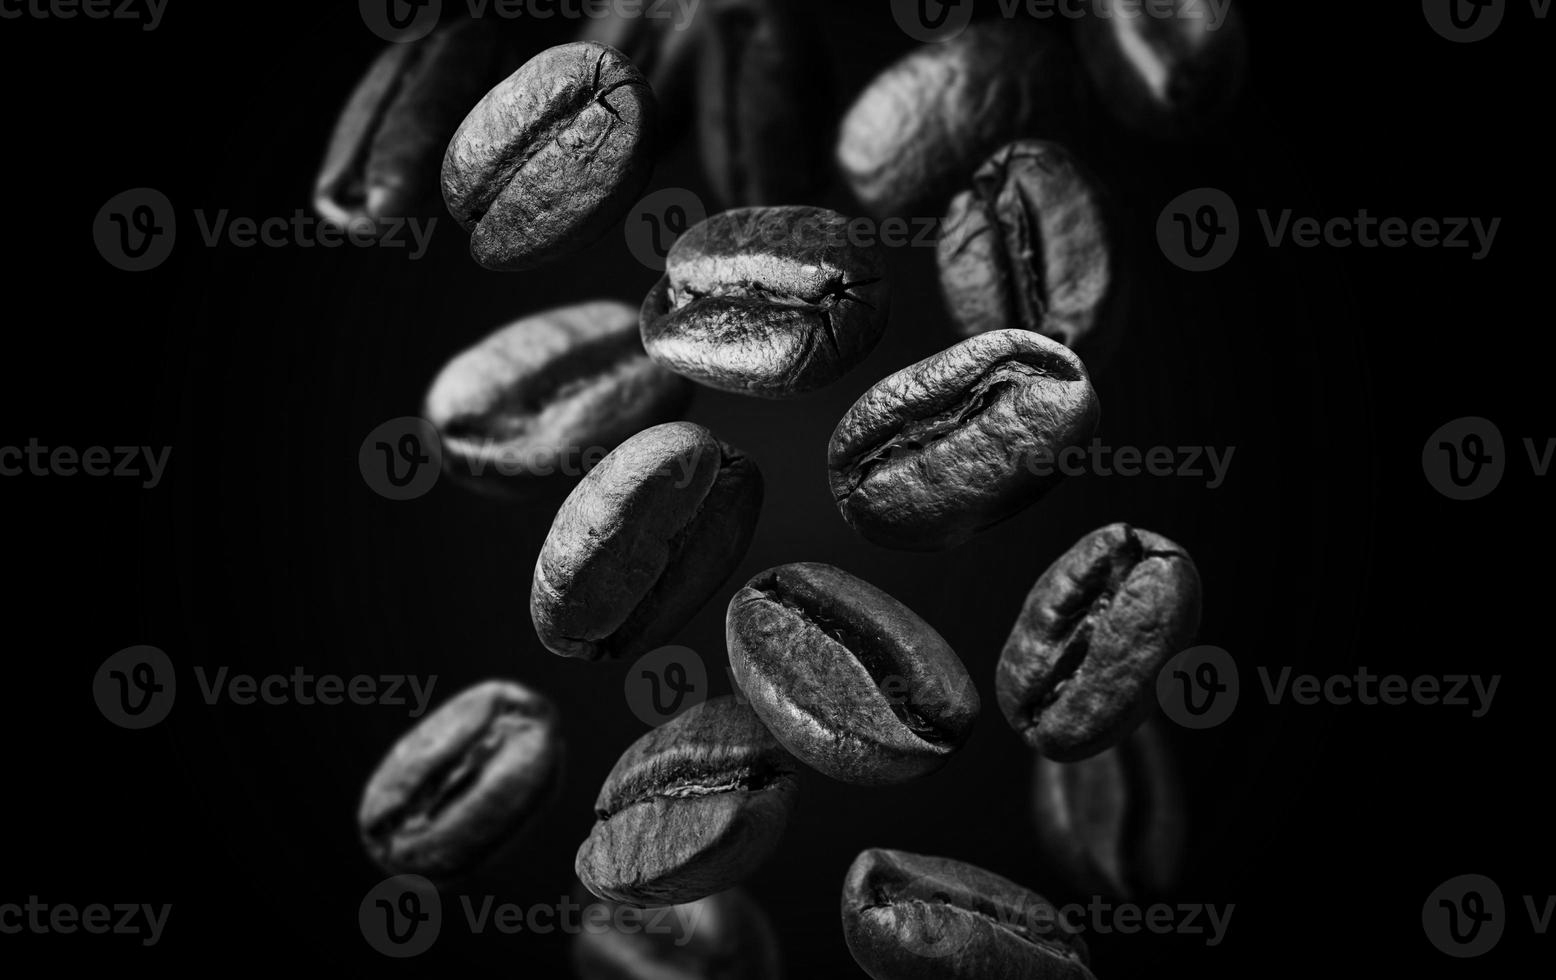

In [100]:
imagen = cv2.imread("cafes.jpg")
imagen_varios = np.zeros(imagen.shape,np.uint8)
for i in range(imagen.shape[0]):
  for j in range(imagen.shape[1]):
    imagen_varios[i,j]=(imagen[i,j,0]*0.299 +imagen[i,j,1] * 0.587 + imagen[i,j,2]*0.114)
medidas(imagen_varios)

cv2_imshow(imagen_varios)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


area =  48703


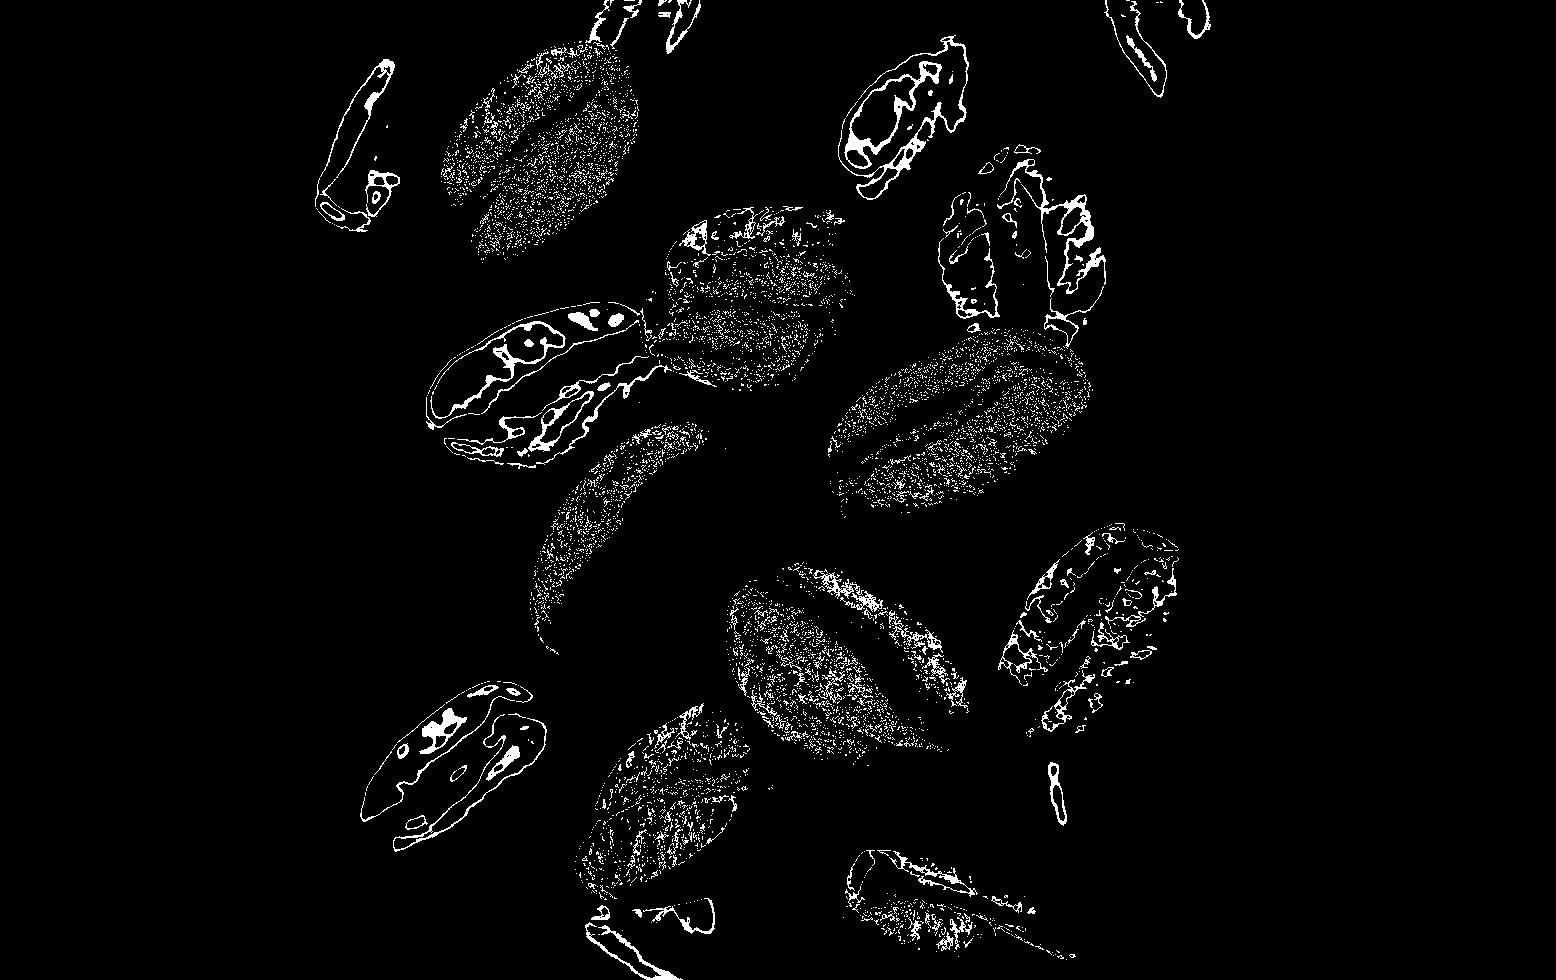

In [102]:
segmentada = segmentar(imagen_varios, 50)
cv2_imshow(segmentada) 